# Red Wine Quality Prediction by Sujan Neupane

<b> In this project, we will make use of different features of a red wine like acidity,density, ph, etc to make predictions on the quality of the red wine. The scale of the red wine's quality is between 0 to 10. This can be both classification as well as regression task. Since we have only 10 response values/labels, I will consider this a classification probelm, and solve it accordingly. However, we can also solve it as a regression problem.</b>

## Installing and importing the dependencies

In [1]:
pip install opendatasets --quiet

In [2]:
import numpy as np
import pandas as pd
import os
import opendatasets as od

## Downloading the Data

We will be using the link to kaggle dataset and opendatasets to directly download the dataset into the collab.

In [3]:
url = 'https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: royalalbert
Your Kaggle Key: ··········


100%|██████████| 25.6k/25.6k [00:00<00:00, 14.0MB/s]

In [4]:
os.listdir('red-wine-quality-cortez-et-al-2009')

['winequality-red.csv']

In [5]:
df = pd.read_csv('red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
new_df = df.copy()

## Gathering Short Insights into the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can clearly see that all columns have total entries, meaning that there are no null values. This helps us because we can now skip the imputation step where we would have had to impute null numeric or categorical columns. 

We can also see that all the columns in the dataframe are numeric, meaning there are no categorical columns.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In our target column `quality`, we can clearly see that almost 80 % of all red wines have quality of value 5. So, It looks like the lowest quality a red wine can have is 3, whereas highest is 8 respectively.

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

As we can see above, There are so many columns . However, we will only select those which have at least loosely correlated with other columns. The columns that are random and have no relation with other columns will often result in creation of noise that will weaken the predictions made by our model.

We will select our models in the `Visualization` and `Feature Engineering` Steps respectively.

## Exploratory Data Analysis and Visualization

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


### Distribution of  `fixed acidity`

In [41]:
df[['fixed acidity']].value_counts()

fixed acidity
0.230088         67
0.221239         57
0.283186         53
0.256637         52
0.212389         50
                 ..
0.787611          1
0.814159          1
0.831858          1
0.858407          1
0.000000          1
Length: 96, dtype: int64

In [42]:
len(df['fixed acidity'].unique())

96

In [43]:
df['fixed acidity'].min(), df['fixed acidity'].max()

(0.0, 1.0)

We can clearly see that the `fixed acidity` column has 96 unique values each ranging from 4.6 to 15.9 respectively.

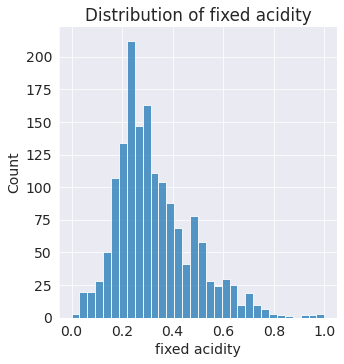

In [44]:
sns.displot(x = df['fixed acidity']).set(title = 'Distribution of fixed acidity');

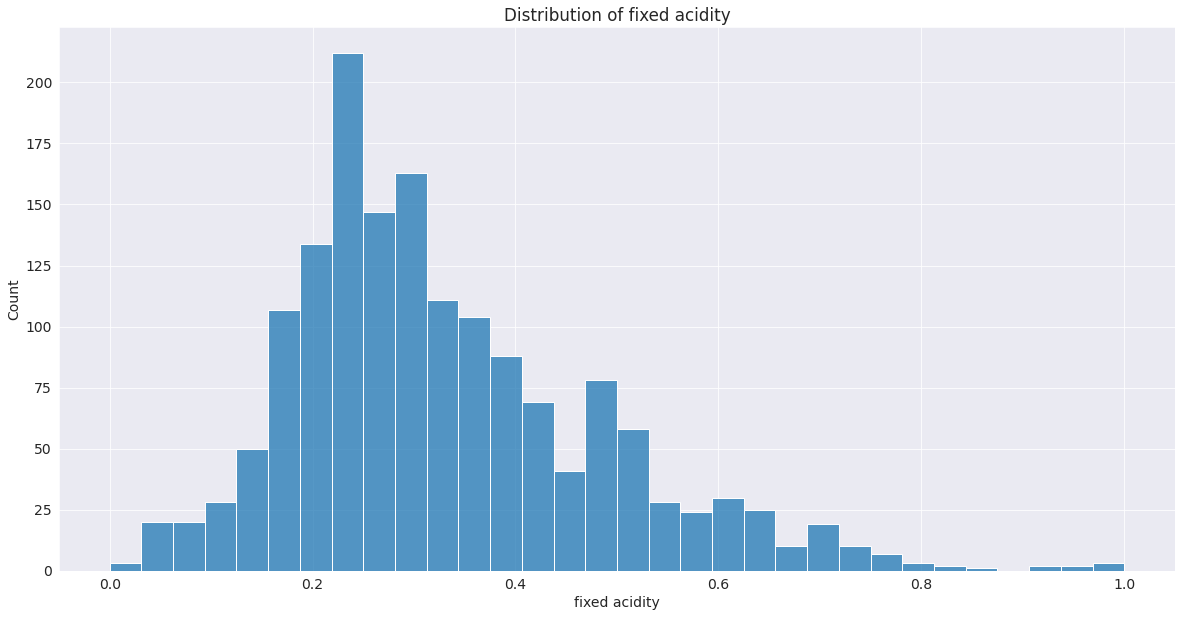

In [45]:
sns.histplot(x = df['fixed acidity']).set(title = 'Distribution of fixed acidity');

<b> Note: Teo book aanusar hyperparameter tuning garda gridsearch cv, randomized cv haru pani heres. They really are useful.

### Distribution of `Volatile acidity`

In [46]:
df[['volatile acidity']]

,volatile acidity
0,0.397260
1,0.520548
2,0.438356
3,0.109589
4,0.397260
...,...
1594,0.328767
1595,0.294521
1596,0.267123
1597,0.359589


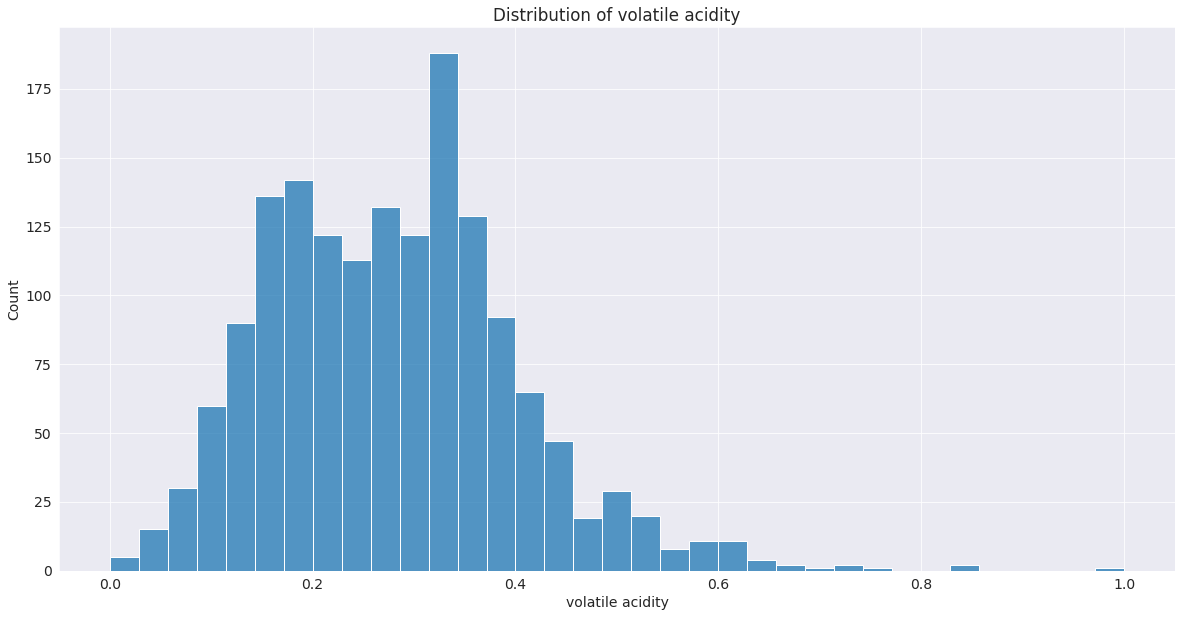

In [47]:
sns.histplot(x = df['volatile acidity']).set(title = 'Distribution of volatile acidity');

### Distribution of `citric acid`

In [48]:
df[['citric acid']]

,citric acid
0,0.00
1,0.00
2,0.04
3,0.56
4,0.00
...,...
1594,0.08
1595,0.10
1596,0.13
1597,0.12


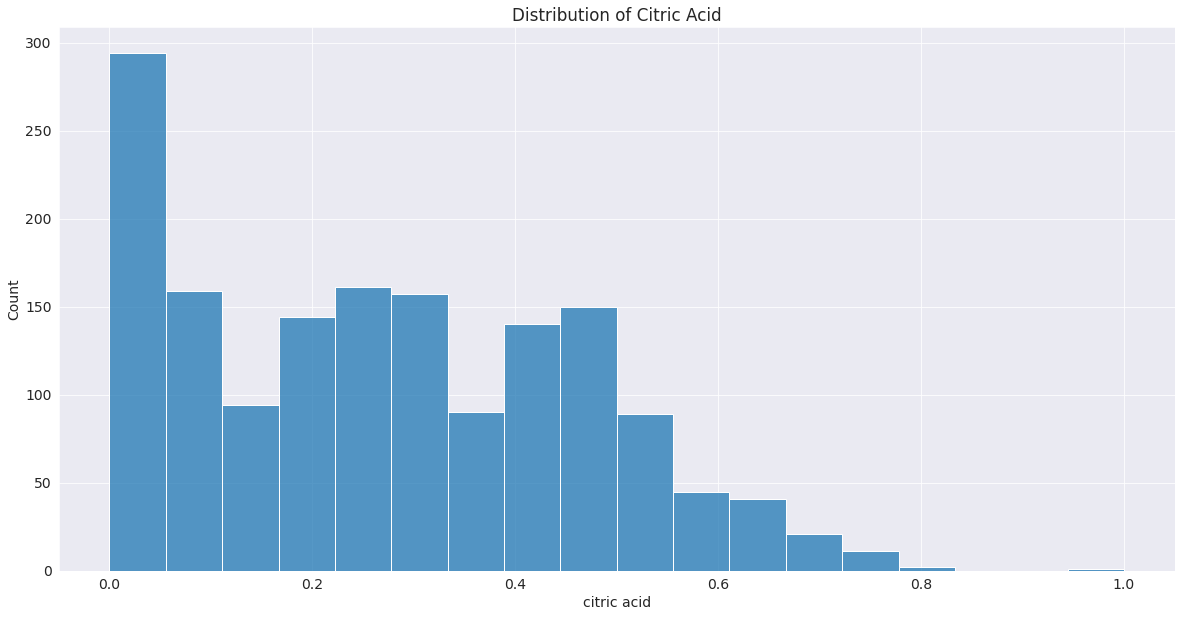

In [49]:
sns.histplot(x = df['citric acid']).set(title = 'Distribution of Citric Acid');

### Distribution of `residual sugar`

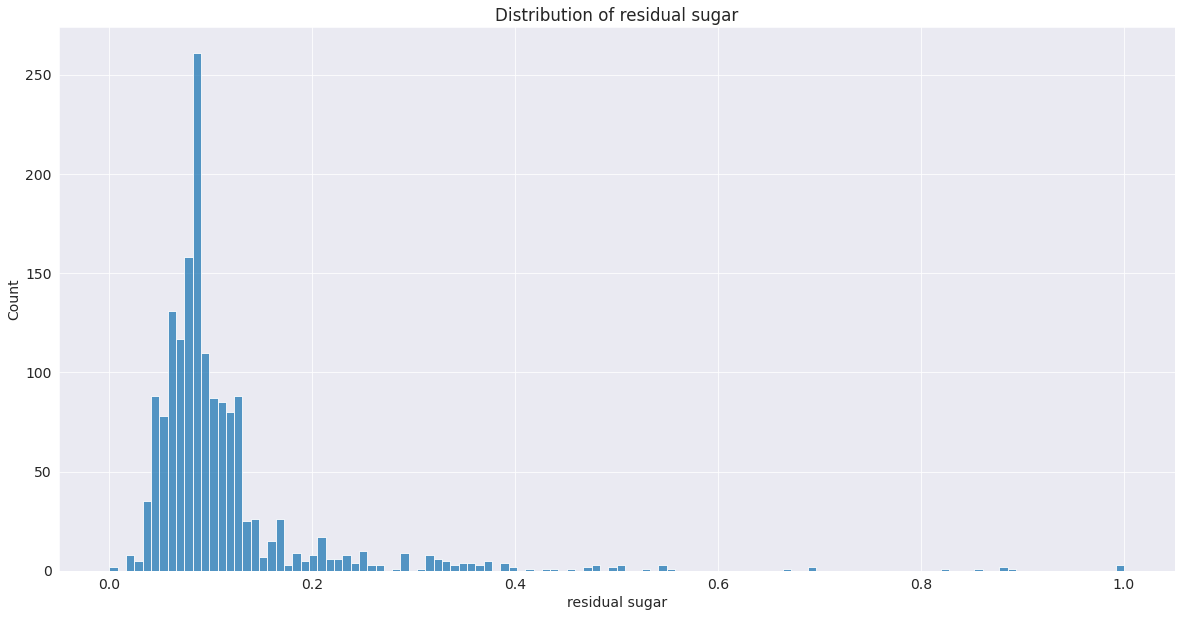

In [50]:
plt.title('Distribution of residual sugar')
sns.histplot(x = df['residual sugar']);

### Distribution of `chlorides`

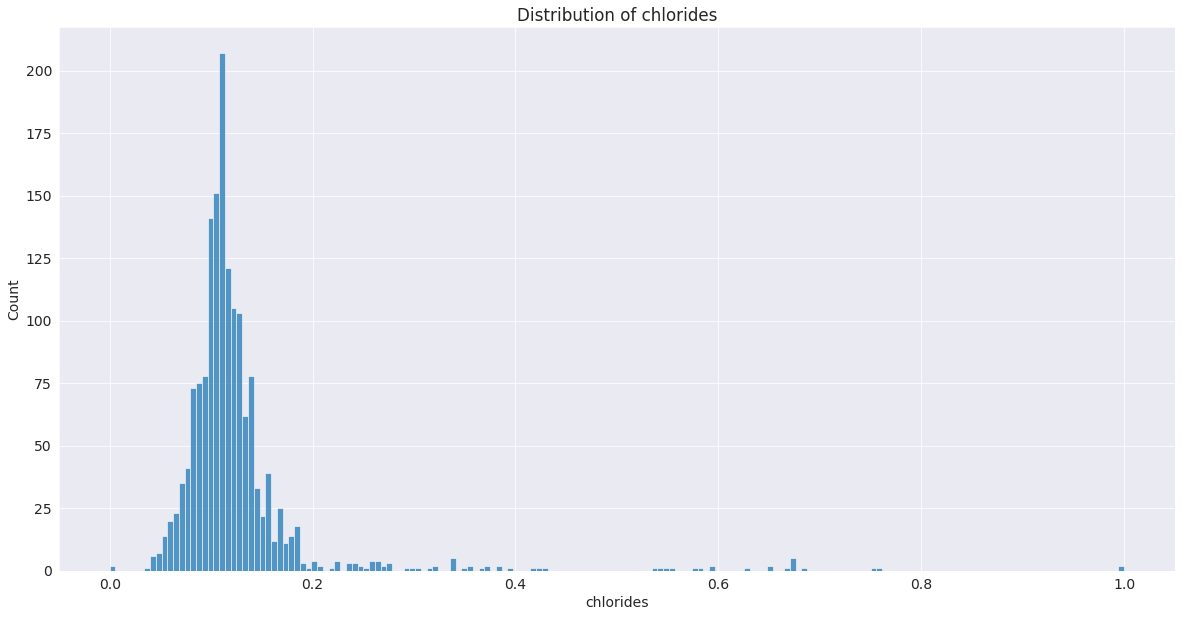

In [51]:
sns.histplot(x = df['chlorides']).set(title = 'Distribution of chlorides');

### Distribution of `free sulphur dioxide`

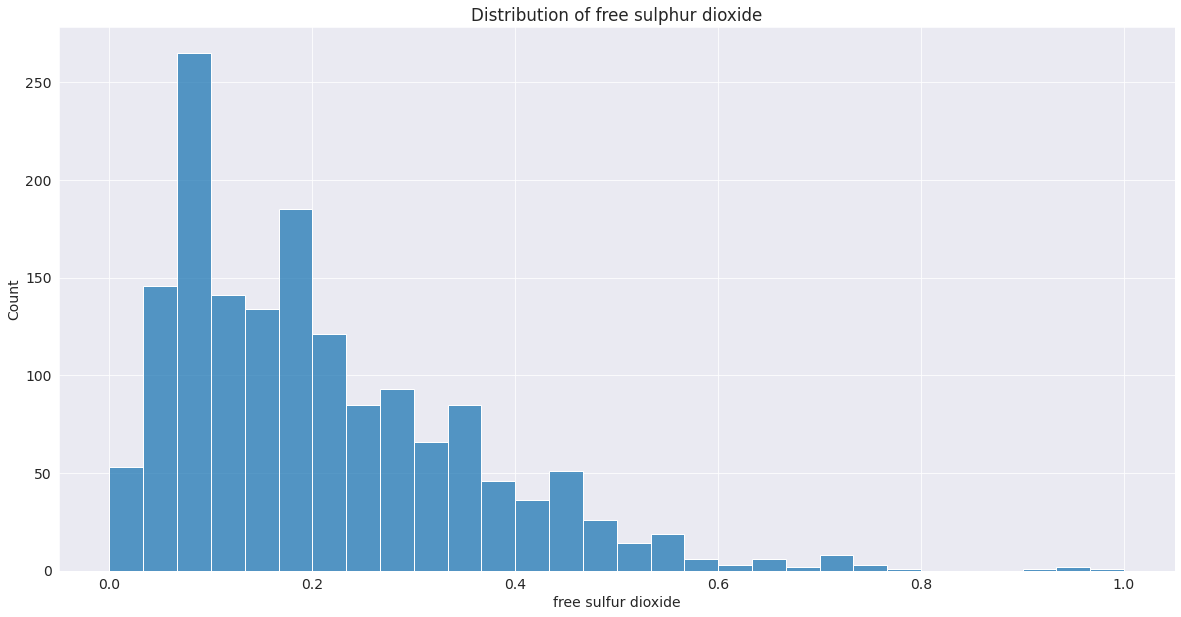

In [52]:
sns.histplot(x = df['free sulfur dioxide']).set(title = 'Distribution of free sulphur dioxide');

### Distribution of `total sulfur dioxide`

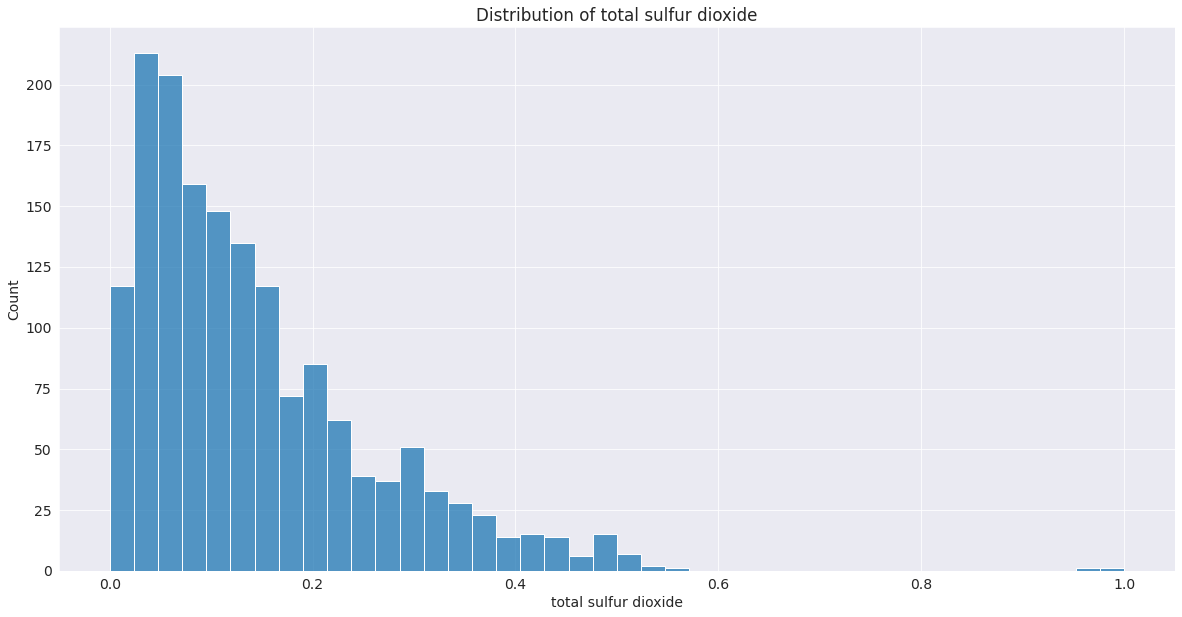

In [53]:
sns.histplot(x = df['total sulfur dioxide']).set(title = 'Distribution of total sulfur dioxide');

### Distribution of `density`

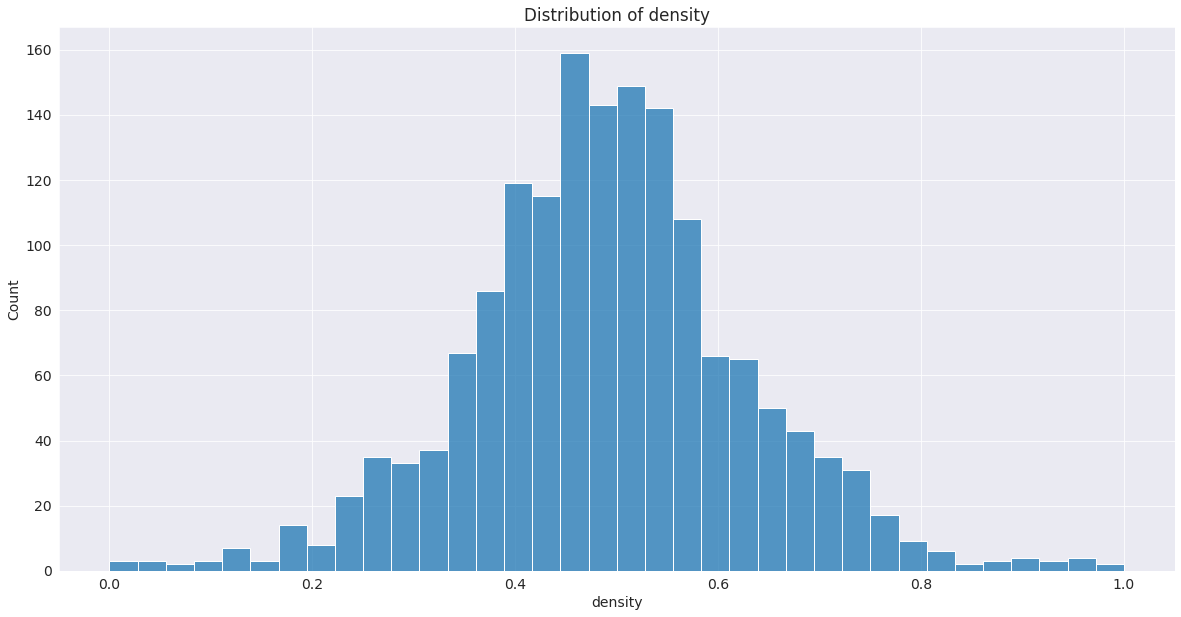

In [54]:
sns.histplot(x = df['density']).set(title = 'Distribution of density');

### Distribution of `pH`

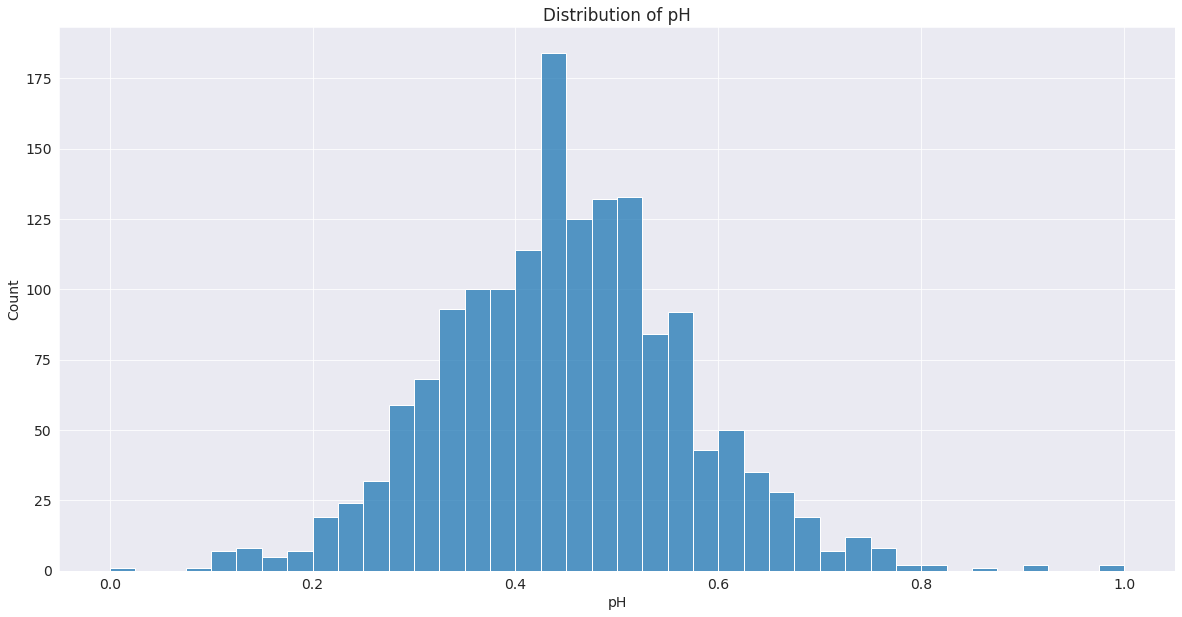

In [55]:
sns.histplot(x = df['pH']).set(title = 'Distribution of pH');

### Distribution of `sulphates`

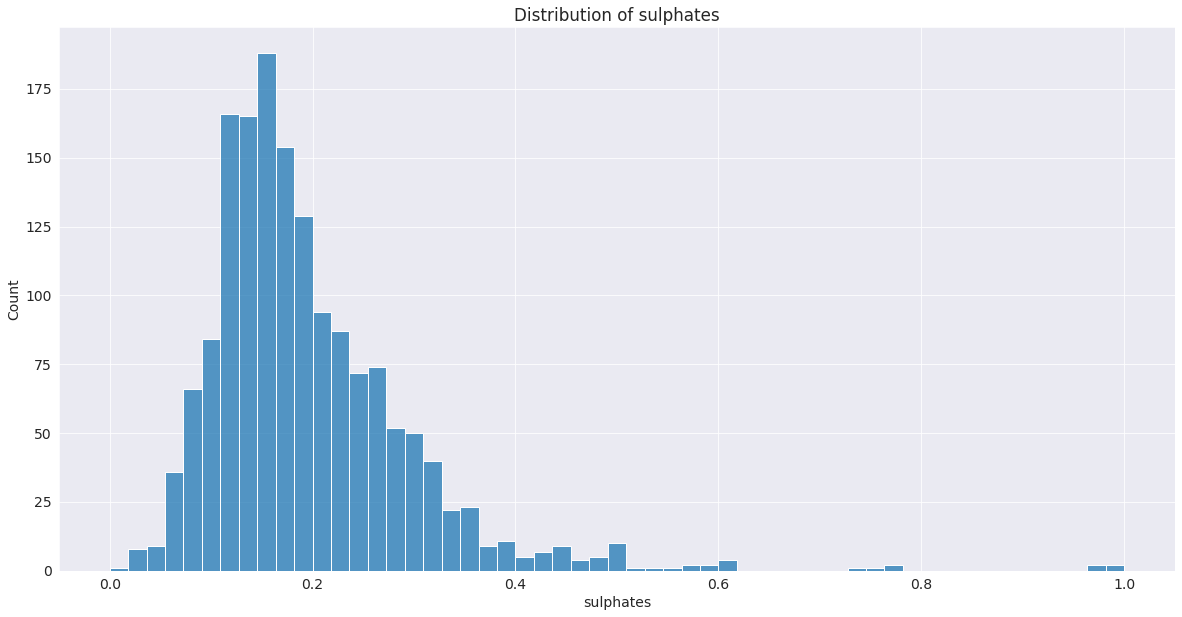

In [56]:
sns.histplot(x = df['sulphates']).set(title = 'Distribution of sulphates');

### Distribution of `alcohol`

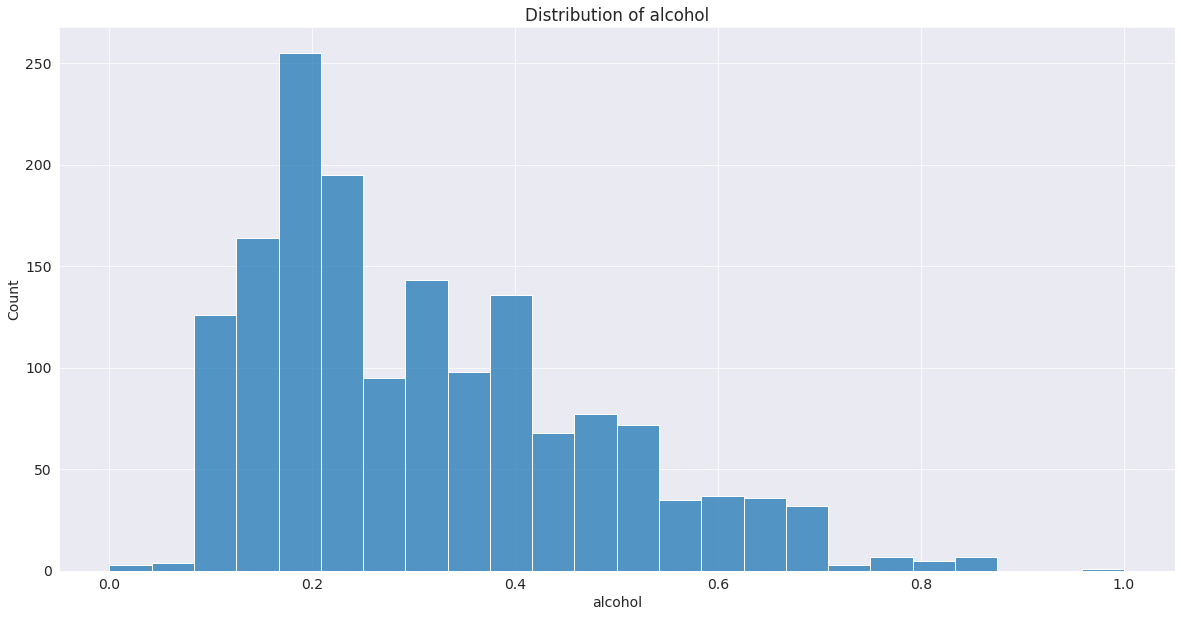

In [57]:
sns.histplot(x = df['alcohol']).set(title = 'Distribution of alcohol');

### For `quality` column

In [58]:
df[['quality']]

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [59]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

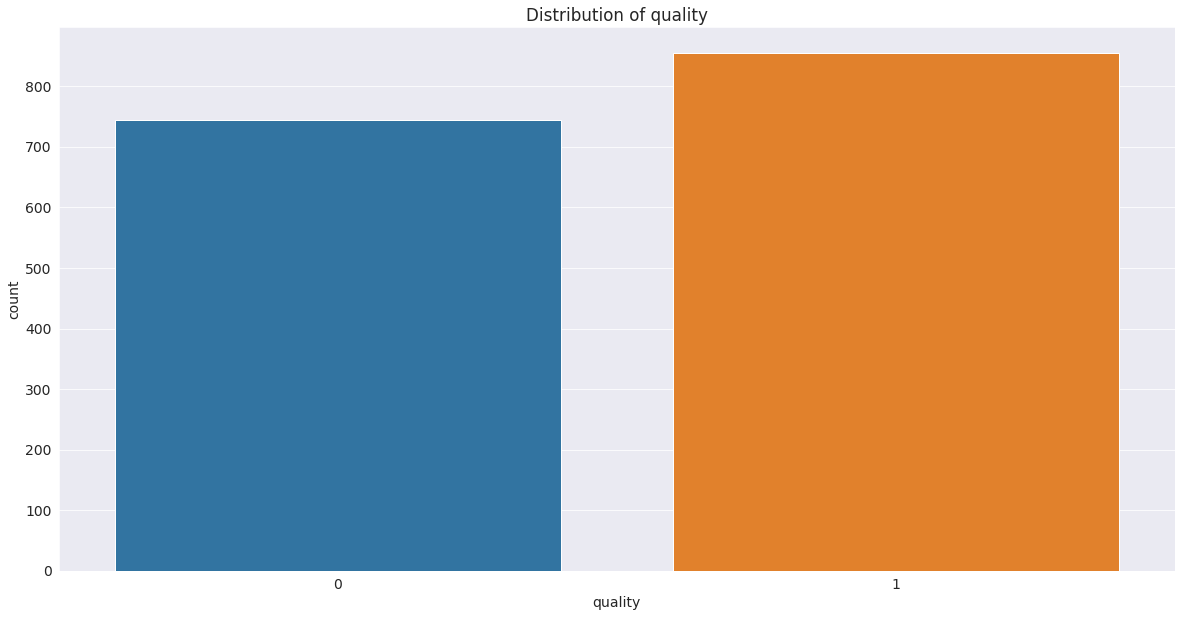

In [60]:
sns.countplot(x = df['quality']).set(title = 'Distribution of quality');

### `Density` vs `alcohol`

In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


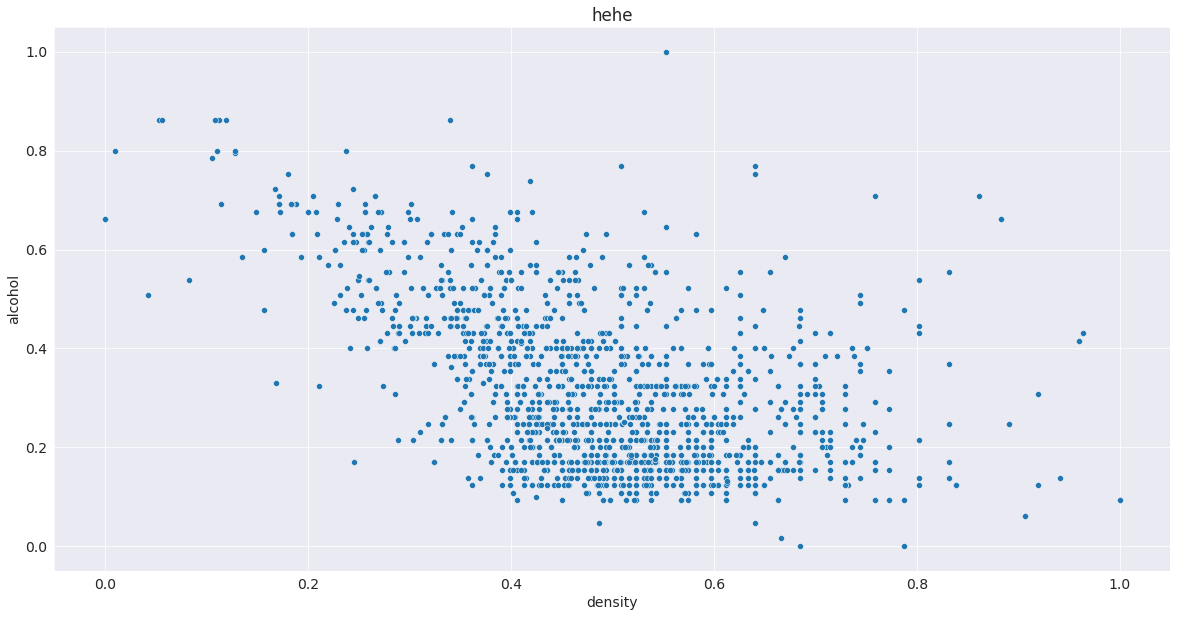

In [62]:
sns.scatterplot(x = 'density', y = 'alcohol', data = df).set(title = 'hehe');

### `Density` vs `pH` vs `quality`

In [63]:
import plotly.express as px

In [64]:
#plt.title("Density vs pH vs Quality of red wine")
px.scatter(df,x = 'density', y = 'pH', color = 'quality', title = 'Density vs pH vs Quality of red wine').show();

### Other visualizations

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


In [66]:
avg_density_when_quality5 = df['density'][df.quality == 5].mean()
avg_density_when_quality6 = df['density'][df.quality == 6].mean()
avg_density_when_quality7 = df['density'][df.quality == 7].mean()
avg_density_when_quality4 = df['density'][df.quality == 4].mean()
avg_density_when_quality8 = df['density'][df.quality == 8].mean()
avg_density_when_quality3 = df['density'][df.quality == 3].mean()

In [67]:
test_df = pd.DataFrame({
    'quality':[5,6,7,4,8,3],
    'avg_density':[avg_density_when_quality5,avg_density_when_quality6,avg_density_when_quality7,avg_density_when_quality4,avg_density_when_quality8,avg_density_when_quality3]
})

In [68]:
test_df

,quality,avg_density
0,5,NaN
1,6,NaN
2,7,NaN
3,4,NaN
4,8,NaN
5,3,NaN


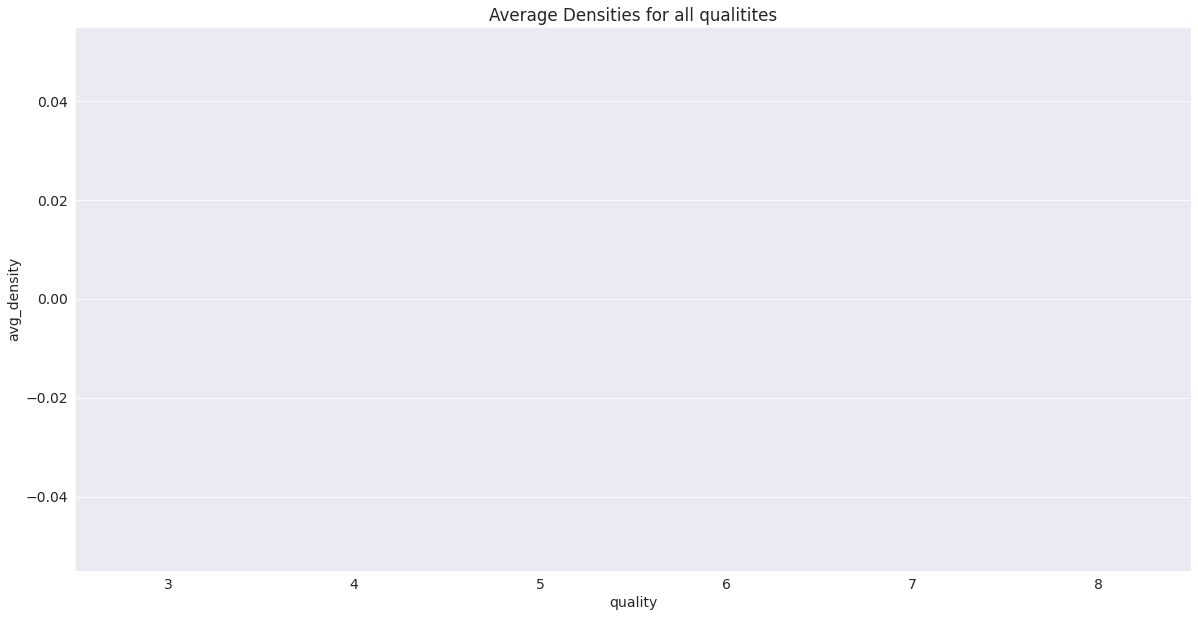

In [69]:
sns.barplot(x = 'quality', y = 'avg_density', data = test_df).set(title = 'Average Densities for all qualitites');

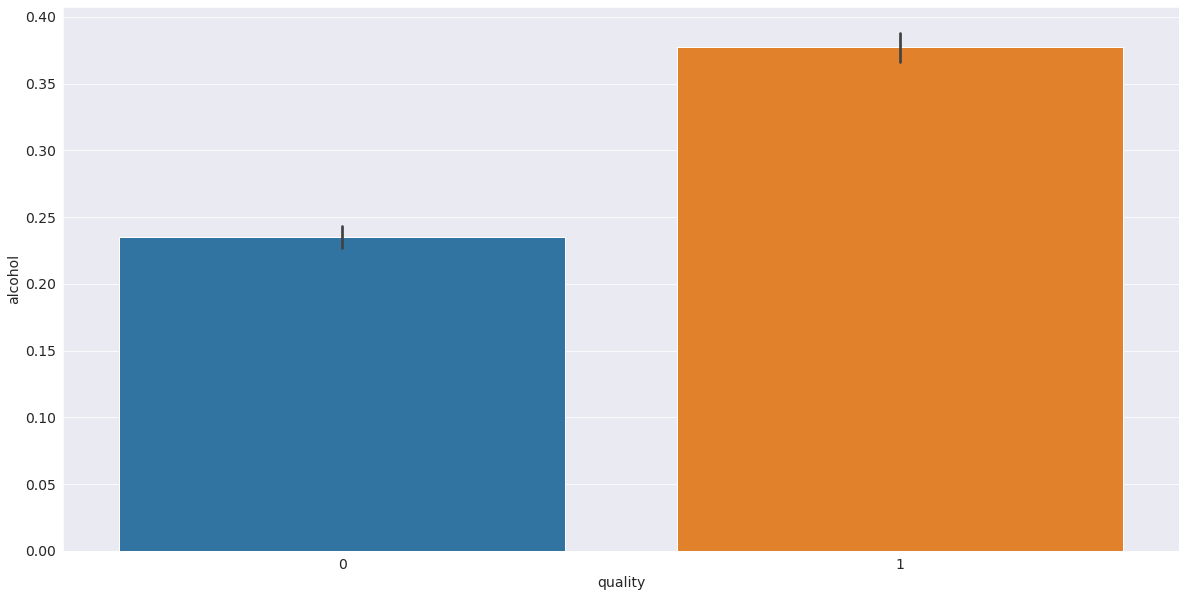

In [70]:
sns.barplot(x = 'quality', y = 'alcohol', data =df);

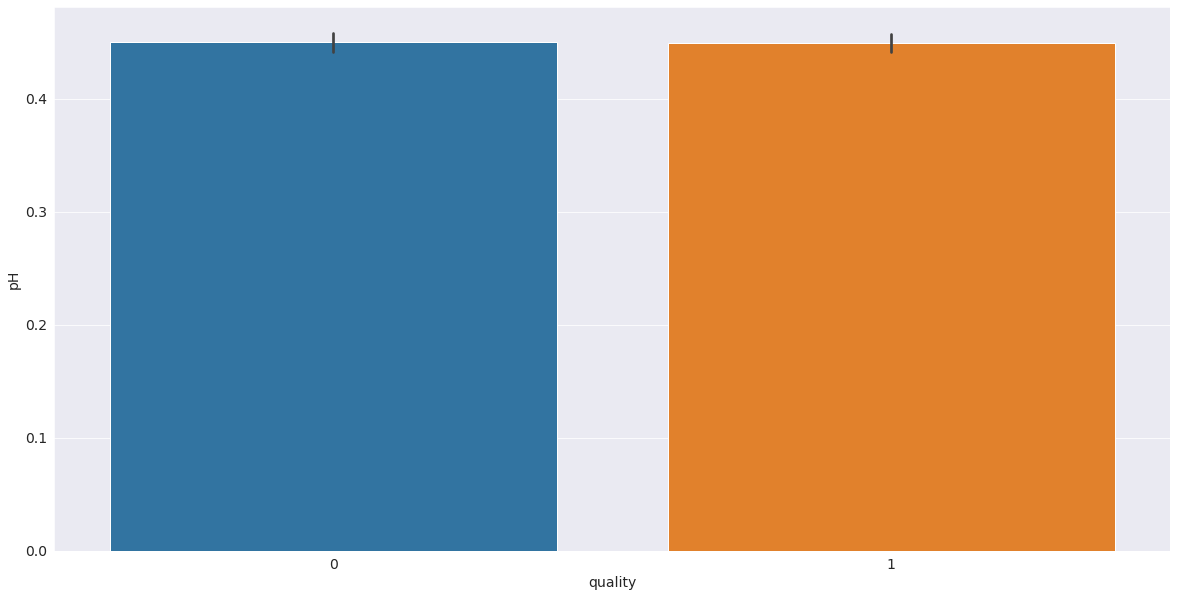

In [71]:
sns.barplot(x = 'quality', y = 'pH', data =df);

### Correlation

In [72]:
correlation = df.corr()

In [73]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


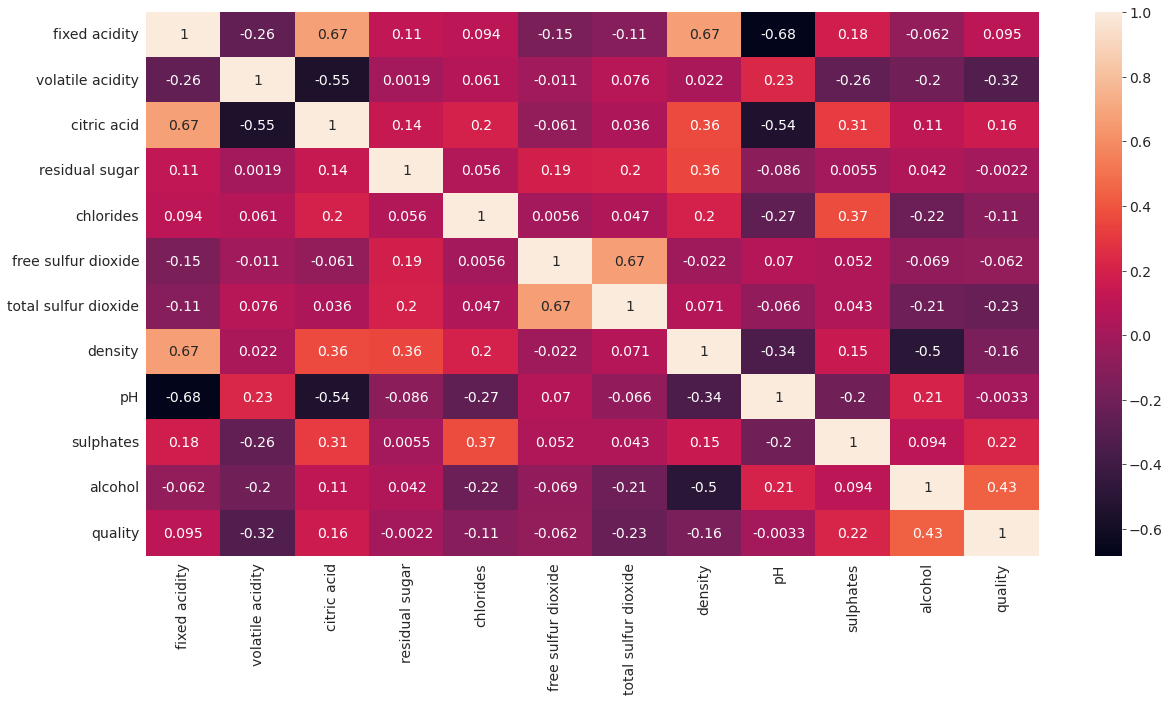

In [74]:
sns.heatmap(correlation, annot = True);

## Preprocessing and Feature Engineering

In [8]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
numeric_cols = df.select_dtypes(include= np.number).columns.tolist()

Steps for preprocessing:

  1. Imputation: Since there are no null values, this step can be skipped.

  2. Encoding categorical features: Since there are no categorical features, this step can also be skipped.

  3. Scaling numeric features: We will use minmax scaler to scale all features from 0 to 1.

Then, we will select those features that are strongly correlated, which will be used for training the model.

### Scaling the features

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df[list(df.columns)[:-1]] = scaler.fit_transform(df[list(df.columns)[:-1]])

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


### Feature Engineering

<b> In this step, we will select certain features that are strongly correlated to each other and use those features for training the model. Remaining features will be left and wont be used for training the model.

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [17]:
df.corr().iloc[1,3]

0.0019178819627907445

In [18]:
len(df.corr().columns)

12

In [19]:
selected_features = []

In [20]:
for i in (df.columns.tolist()):
  if (abs(df[i].corr(df.quality)) >= 0.1):
    selected_features.append(i)

In [21]:
selected_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality']

The above features will be selected as they have a good correlation with the response/target feature. Other features will be discarded.

We will convert all values in the target feature into 0's and 1's. For values greater than or equal to 6, we will assign them to value 1, else 0. In this way, this problem will be converted from multiple class classification into a binary classification.

In [22]:
df['quality'] = df['quality'].apply(lambda x: 1 if x>=6 else 0)

In [23]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

## Preparing Training,and Testing Set

In [24]:
X = df[selected_features].drop('quality', axis = 1)
y = df.quality

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)

## Using  Random Forest Model

### Training our Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
train_pred = forest.predict(X_train)

In [29]:
test_pred = forest.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_train, train_pred)

1.0

In [32]:
accuracy_score(y_test,test_pred)

0.7925

We can clearly see that our model has overfitted in the training data. Therefore, we will perform hyperparameter tuning on our random forest model.

### Tree Visualization and feature importance

In [75]:
forest.classes_

array([0, 1])

In [76]:
forest.n_estimators

100

In [77]:
forest.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [78]:
forest.estimators_[99]

DecisionTreeClassifier(max_features='auto', random_state=134489564)

In [79]:
from sklearn.tree import plot_tree, export_text

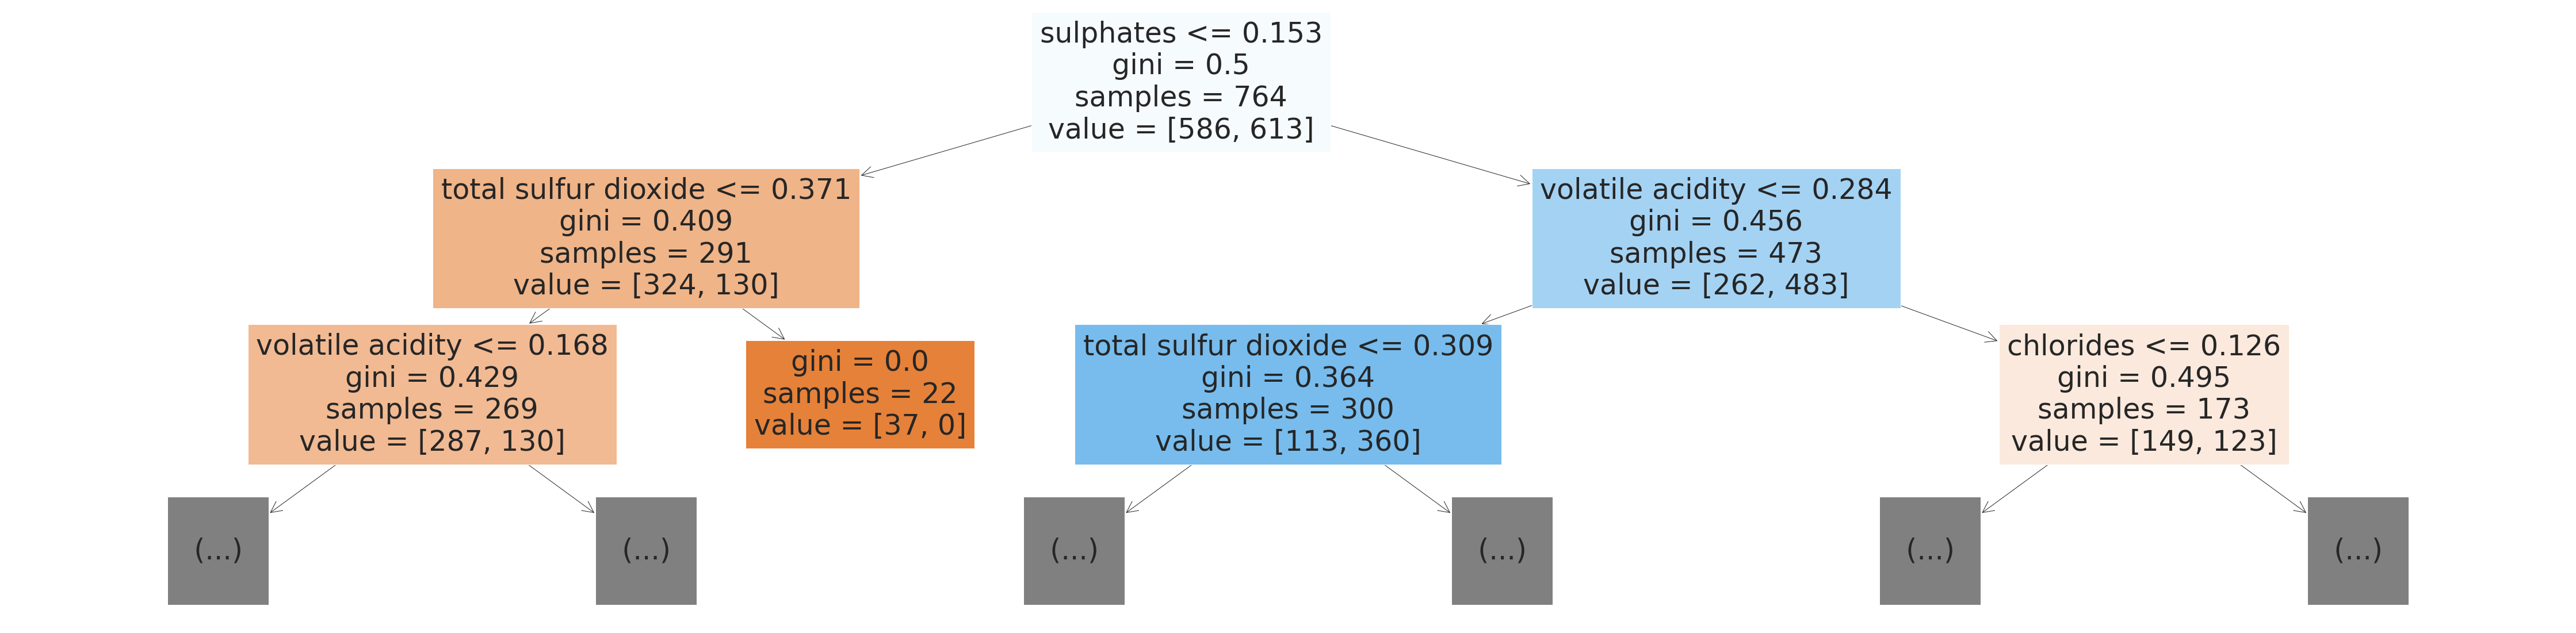

In [80]:
# displaying the first descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True);

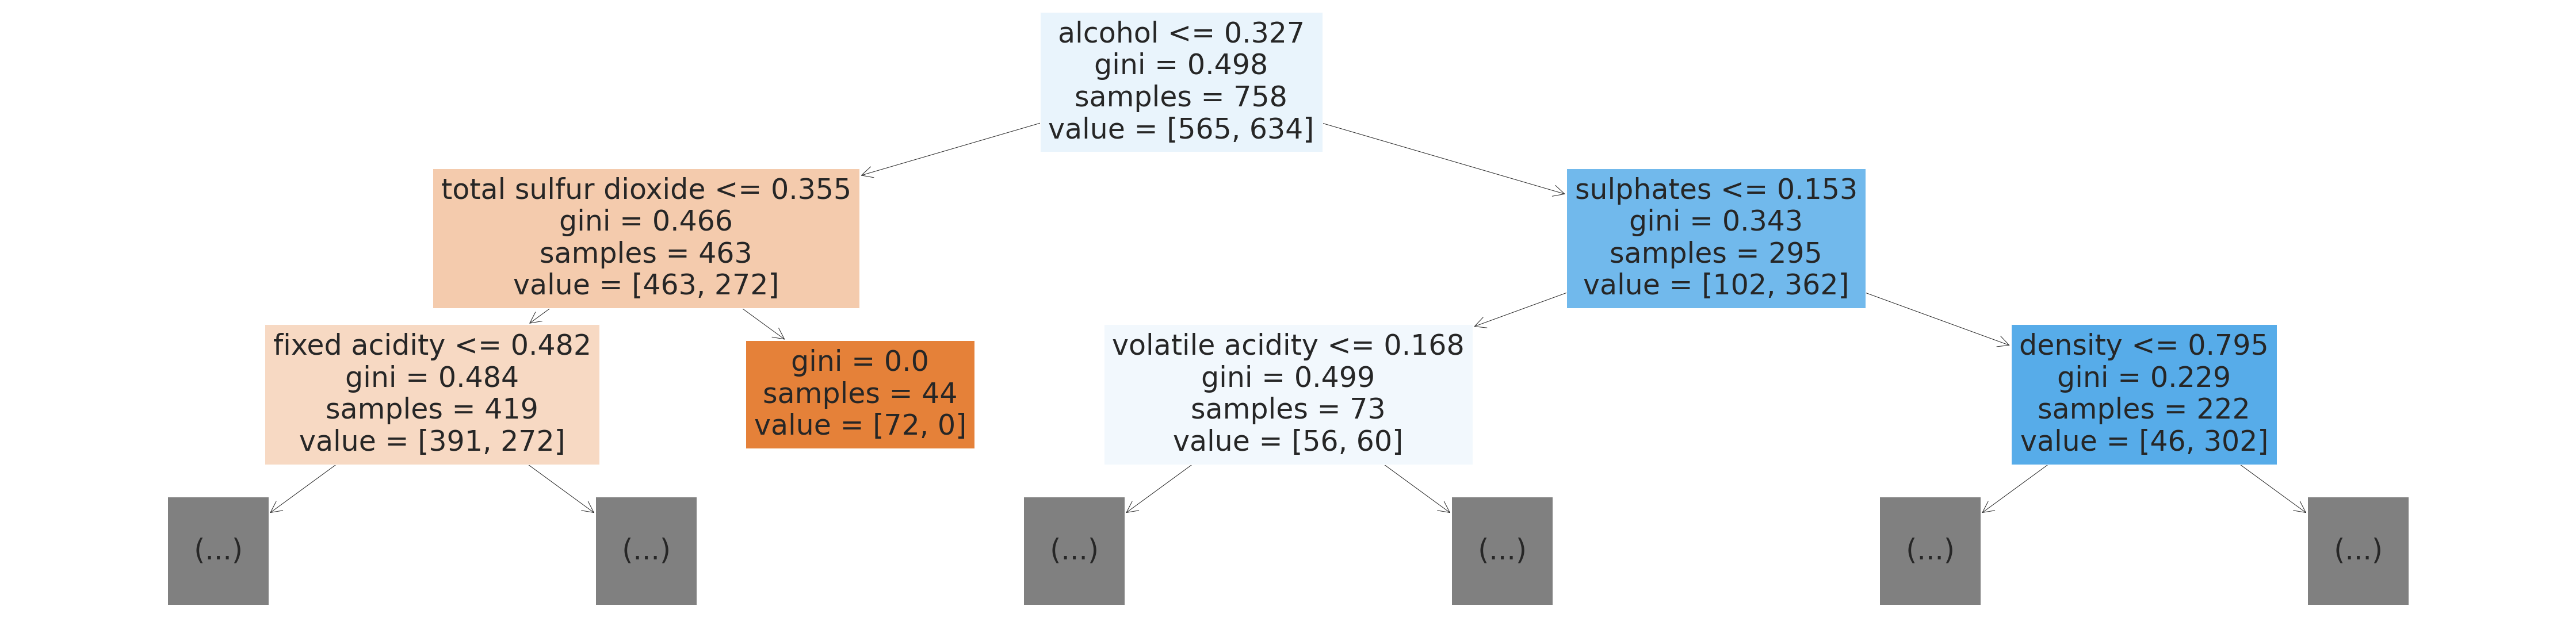

In [81]:
# displaying the last descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[99], max_depth=2, feature_names=X_train.columns, filled=True);

In [82]:
tree_text = export_text(forest.estimators_[0], max_depth=2, feature_names=list(X_train.columns))
print(tree_text)

|--- sulphates <= 0.15
|   |--- total sulfur dioxide <= 0.37
|   |   |--- volatile acidity <= 0.17
|   |   |   |--- truncated branch of depth 4
|   |   |--- volatile acidity >  0.17
|   |   |   |--- truncated branch of depth 13
|   |--- total sulfur dioxide >  0.37
|   |   |--- class: 0.0
|--- sulphates >  0.15
|   |--- volatile acidity <= 0.28
|   |   |--- total sulfur dioxide <= 0.31
|   |   |   |--- truncated branch of depth 13
|   |   |--- total sulfur dioxide >  0.31
|   |   |   |--- truncated branch of depth 4
|   |--- volatile acidity >  0.28
|   |   |--- chlorides <= 0.13
|   |   |   |--- truncated branch of depth 10
|   |   |--- chlorides >  0.13
|   |   |   |--- truncated branch of depth 11



In [83]:
forest.feature_importances_

array([0.09318946, 0.1332339 , 0.08314636, 0.09417419, 0.12869163,
       0.12349709, 0.14489381, 0.19917355])

In [84]:
importances = {
    'Features':X_train.columns,
    'Weights':forest.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
7,alcohol,0.199174
6,sulphates,0.144894
1,volatile acidity,0.133234
4,total sulfur dioxide,0.128692
5,density,0.123497
3,chlorides,0.094174
0,fixed acidity,0.093189
2,citric acid,0.083146


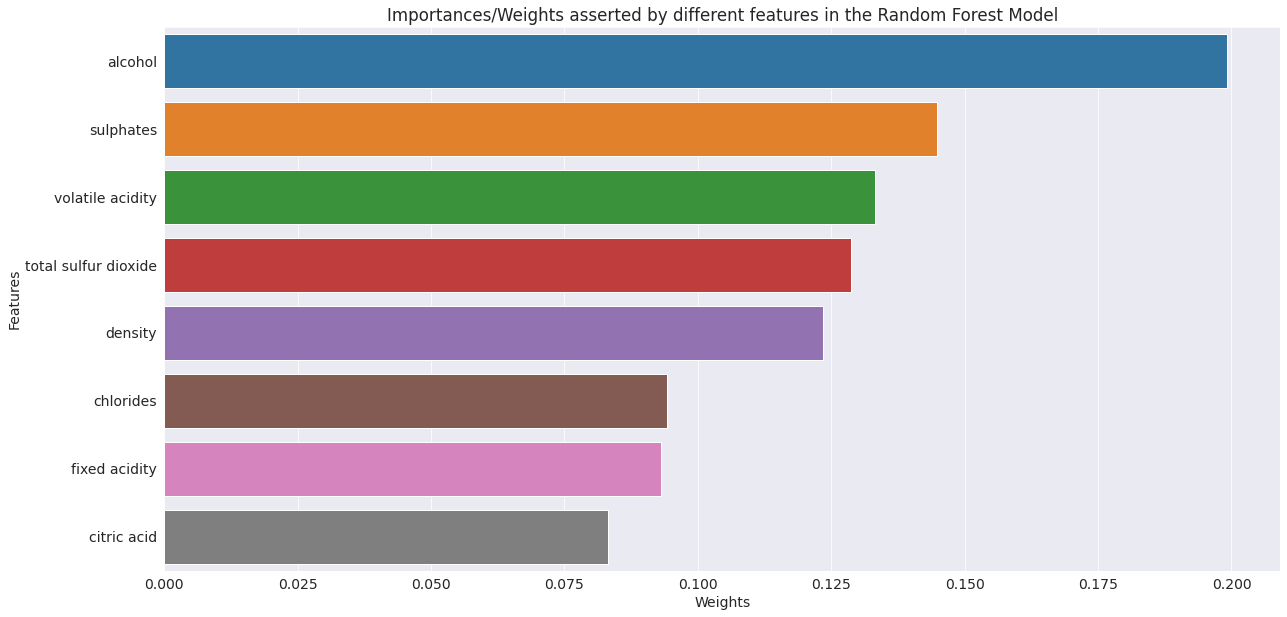

In [85]:
plt.title("Importances/Weights asserted by different features in the Random Forest Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

### Performing Hyperparameter tuning on random forest model

GridSearch CV


Randomized CV


We will tune the following hyperparameters#

  1. n_estimators

  2. max_depth

  3. max_leaf_nodes

<b> Using Grid Search CV </b>

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = [
             {'n_estimators': list(range(50,150,50)), 'max_depth': [4,12,24], 'max_leaf_nodes': [128,64,256]}
]

In [88]:
grid_search = GridSearchCV(forest, param_grid, cv = 10, scoring = 'accuracy', n_jobs = -1)

In [89]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [4, 12, 24],
                          'max_leaf_nodes': [128, 64, 256],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

In [90]:
grid_search.best_params_

{'max_depth': 12, 'max_leaf_nodes': 256, 'n_estimators': 100}

In [91]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_jobs=-1,
                       random_state=42)

In [92]:
cvres = grid_search.cv_results_

In [93]:
cvres

{'mean_fit_time': array([0.12884598, 0.24897738, 0.12490273, 0.2497843 , 0.12515163,
        0.2524591 , 0.18787248, 0.35034347, 0.20032959, 0.34175761,
        0.20679541, 0.35228624, 0.20761354, 0.34414046, 0.12492995,
        0.25295765, 0.19687369, 0.32218688]),
 'mean_score_time': array([0.10414405, 0.10546827, 0.10529027, 0.10456398, 0.10398636,
        0.10427003, 0.10417626, 0.1045635 , 0.10414548, 0.10345201,
        0.10343256, 0.10345528, 0.10347371, 0.10345039, 0.10390625,
        0.10600908, 0.10337884, 0.10393097]),
 'mean_test_score': array([0.76398459, 0.76232493, 0.76398459, 0.76232493, 0.76398459,
        0.76232493, 0.80486695, 0.80404762, 0.79237395, 0.79319328,
        0.80904762, 0.81156162, 0.80654762, 0.80153361, 0.79152661,
        0.79735294, 0.80488095, 0.80654762]),
 'param_max_depth': masked_array(data=[4, 4, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 24, 24, 24,
                    24, 24, 24],
              mask=[False, False, False, False, False, False, False, 

In [94]:
for mean, params in zip(cvres['mean_test_score'], cvres['params']):
  print(round(mean,2)*100, params)

76.0 {'max_depth': 4, 'max_leaf_nodes': 128, 'n_estimators': 50}
76.0 {'max_depth': 4, 'max_leaf_nodes': 128, 'n_estimators': 100}
76.0 {'max_depth': 4, 'max_leaf_nodes': 64, 'n_estimators': 50}
76.0 {'max_depth': 4, 'max_leaf_nodes': 64, 'n_estimators': 100}
76.0 {'max_depth': 4, 'max_leaf_nodes': 256, 'n_estimators': 50}
76.0 {'max_depth': 4, 'max_leaf_nodes': 256, 'n_estimators': 100}
80.0 {'max_depth': 12, 'max_leaf_nodes': 128, 'n_estimators': 50}
80.0 {'max_depth': 12, 'max_leaf_nodes': 128, 'n_estimators': 100}
79.0 {'max_depth': 12, 'max_leaf_nodes': 64, 'n_estimators': 50}
79.0 {'max_depth': 12, 'max_leaf_nodes': 64, 'n_estimators': 100}
81.0 {'max_depth': 12, 'max_leaf_nodes': 256, 'n_estimators': 50}
81.0 {'max_depth': 12, 'max_leaf_nodes': 256, 'n_estimators': 100}
81.0 {'max_depth': 24, 'max_leaf_nodes': 128, 'n_estimators': 50}
80.0 {'max_depth': 24, 'max_leaf_nodes': 128, 'n_estimators': 100}
79.0 {'max_depth': 24, 'max_leaf_nodes': 64, 'n_estimators': 50}
80.0 {'max_dep

Our best model is given below:

In [95]:
forest = grid_search.best_estimator_

In [96]:
test_pred = forest.predict(X_test)

In [97]:
accuracy_score(y_test, test_pred) * 100 

80.0

<b> Lets perform same operation using RandomizedSearchCV and check if there is difference between these methods. </b>

<b> RandomizedSearchCV </b>

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
param_grid = [
             {'n_estimators': list(range(50,150,50)), 'max_depth': [4,12,24], 'max_leaf_nodes': [128,64,256]}
]

In [100]:
rand = RandomizedSearchCV(forest,param_grid, cv = 10, n_jobs = -1, scoring= 'accuracy')

In [101]:
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=12,
                                                    max_leaf_nodes=256,
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [4, 12, 24],
                                         'max_leaf_nodes': [128, 64, 256],
                                         'n_estimators': [50, 100]}],
                   scoring='accuracy')

In [102]:
rand.best_params_

{'max_depth': 12, 'max_leaf_nodes': 256, 'n_estimators': 50}

In [103]:
rand.best_estimator_

RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [104]:
cvres = rand.cv_results_

In [105]:
for mean, params in zip(cvres['mean_test_score'], cvres['params']):
  print(round(mean,2)*100, params)

81.0 {'n_estimators': 50, 'max_leaf_nodes': 256, 'max_depth': 12}
76.0 {'n_estimators': 50, 'max_leaf_nodes': 64, 'max_depth': 4}
80.0 {'n_estimators': 50, 'max_leaf_nodes': 128, 'max_depth': 12}
79.0 {'n_estimators': 50, 'max_leaf_nodes': 64, 'max_depth': 12}
76.0 {'n_estimators': 100, 'max_leaf_nodes': 64, 'max_depth': 4}
76.0 {'n_estimators': 100, 'max_leaf_nodes': 128, 'max_depth': 4}
80.0 {'n_estimators': 100, 'max_leaf_nodes': 128, 'max_depth': 12}
76.0 {'n_estimators': 100, 'max_leaf_nodes': 256, 'max_depth': 4}
80.0 {'n_estimators': 50, 'max_leaf_nodes': 256, 'max_depth': 24}
80.0 {'n_estimators': 100, 'max_leaf_nodes': 128, 'max_depth': 24}


In [106]:
forest = rand.best_estimator_

In [107]:
test_pred = forest.predict(X_test)

In [108]:
accuracy_score(y_test, test_pred) * 100 

79.75

We can clearly see that our previous model had better accuracy in the testing data. Therefore, we will use that model to make predictions.

In [109]:
forest = RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_jobs=-1,random_state=42, n_estimators = 100)

## Building the System

In [111]:
selected_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality']

In [112]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<b> Creating column transformer</b>


In [113]:
from sklearn.compose import ColumnTransformer

In [114]:
all_cols = new_df.columns.tolist()

In [115]:
dropping_cols = [i for i in all_cols if i not in selected_features]
dropping_cols

['residual sugar', 'free sulfur dioxide', 'pH']

In [116]:
 pre_process = ColumnTransformer(remainder = 'passthrough',
                                transformers = [('drop_columns', 'drop', dropping_cols),
                                                ('scaler', MinMaxScaler(),selected_features[0:-1])])

<b> Creating the pipeling </b>

In [117]:
from sklearn.pipeline import Pipeline

In [110]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_jobs=-1,
                       random_state=42)

In [118]:
pipeline = Pipeline(steps = [
                             ('preprocessing', pre_process),
                             ('random_forest',RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_jobs=-1,random_state=42))
])

In [119]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['residual sugar',
                                                   'free sulfur dioxide',
                                                   'pH']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid', 'chlorides',
                                                   'total sulfur dioxide',
                                                   'density', 'sulphates',
                                                   'alcohol'])])),
                ('random_forest',
                 RandomForestClassifier(max_depth=12, max_leaf_nodes=256,
           

In [120]:
new_df['quality'] = new_df['quality'].apply(lambda x: 1 if x>=6 else 0)

In [121]:
train_x = new_df.drop(columns = ['quality'])
train_y = new_df.quality

In [122]:
pipeline.fit(train_x,train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['residual sugar',
                                                   'free sulfur dioxide',
                                                   'pH']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid', 'chlorides',
                                                   'total sulfur dioxide',
                                                   'density', 'sulphates',
                                                   'alcohol'])])),
                ('random_forest',
                 RandomForestClassifier(max_depth=12, max_leaf_nodes=256,
           

In [124]:
accuracy_score(train_y, pipeline.predict(train_x))

0.9956222639149468

In [125]:
from sklearn.model_selection import cross_val_score

In [127]:
scores = cross_val_score(pipeline, train_x, train_y, cv = 10, scoring = 'accuracy')

In [129]:
scores.mean()

0.730436320754717

## Building the deployment Systems

In [130]:
selected_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality']

In [132]:
column_transformer = ColumnTransformer(remainder = 'passthrough',
                                       transformers = [('scaler', MinMaxScaler(), selected_features[0:-1])])

In [134]:
pipeline = Pipeline(steps = [
                             ('preprocessing', column_transformer),
                             ('random_forest',RandomForestClassifier(max_depth=12, max_leaf_nodes=256, n_jobs=-1,random_state=42))
])

In [135]:
import pickle

In [136]:
pickle.dump(column_transformer, open('column_transformer.pkl', 'wb'))

In [137]:
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

In [139]:
pickle.dump(selected_features, open('selected_features', 'wb'))